<a href="https://colab.research.google.com/github/varJATIN/Ocular-fundus-image-Analysis/blob/main/Walter_Klein_Contrast_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

## Seeding 
seed = 2
random.seed = seed
np.random.seed = seed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.utils import shuffle
from matplotlib.pyplot import imread
from cv2 import resize
import matplotlib.pyplot as plt
import cv2

In [ ]:
data_location = "/content/drive/My Drive/IDRid/A. Segmentation/1. Original Images/a. Training Set"
train_images_paths = []  # create an empty list
for (dirName, subdirList, fileList) in sorted(os.walk(data_location)):
    for fileName in sorted(fileList):
        if ".jpg" in fileName.lower() :
            train_images_paths.append(os.path.join(dirName,fileName))

#train_images_paths

In [ ]:

# groundtruths for hard exudates
target_root_location = "/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/"
#data_location = "/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates"
train_data_gt = []  # create an empty list
segs=['1. Microaneurysms','2. Haemorrhages','3. Hard Exudates','4. Soft Exudates']
for seg in segs:
  data_location=target_root_location+seg
  print(data_location)
  seg_mask=[]
  for dirName, subdirList, fileList in sorted(os.walk(data_location)):
      for filename in sorted(fileList):
          if ".tif" in filename.lower() :
              seg_mask.append(os.path.join(dirName,filename))
              #train_data_gt.append(os.path.join(dirName,filename))
  train_data_gt.append(seg_mask)
print(len(train_data_gt));

/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/1. Microaneurysms
/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/2. Haemorrhages
/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates
/content/drive/My Drive/IDRid/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates
4


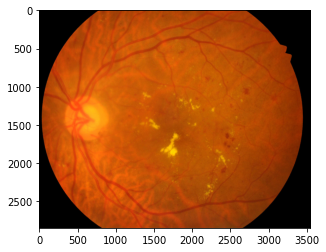

In [ ]:
img_sz = 2800
img = imread(train_images_paths[20])
img=img[:,250:3800,:]
plt.imshow(img)
plt.show()
img = cv2.resize(img, (img_sz, img_sz))
#print(img.shape)
#plt.imshow(img)
#plt.show()

#Clahe

## Walter Klein 


130


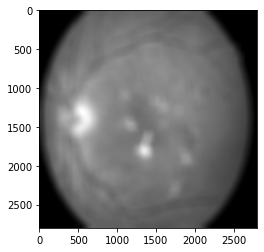

[[ 2.78454577e-05  2.78454577e-05  2.78454577e-05 ...  3.60365912e-16
   3.60365912e-16  3.60365912e-16]
 [ 2.78454577e-05  2.78454577e-05  2.78454577e-05 ...  3.60365912e-16
   3.60365912e-16  3.60365912e-16]
 [ 2.78454577e-05  2.78454577e-05  2.78454577e-05 ...  3.66738198e-16
   3.66738198e-16  3.66738198e-16]
 ...
 [ 7.43340301e-17  7.43340301e-17 -1.11368837e-16 ... -7.25640783e-16
  -7.25640783e-16 -7.25640783e-16]
 [ 7.43340301e-17  7.43340301e-17 -1.11368837e-16 ... -7.28267709e-16
  -7.28267709e-16 -7.28267709e-16]
 [ 7.43340301e-17  7.43340301e-17 -1.11368837e-16 ... -7.26093249e-16
  -7.26093249e-16 -7.26093249e-16]]
(2800, 2800)
-6.698944489197488e-15 0.6766947441698593


In [ ]:
G=img[:,:,1]/255square_size =int(25/536 * G.shape[1])
print(square_size)
uw = cv2.blur(G, (square_size, square_size))
plt.imshow(uw,cmap='gray')
plt.show()
print(uw)
print(uw.shape)
print(np.min(uw), np.max(uw))

In [ ]:
Iw = np.zeros((uw.shape[0], uw.shape[1]))
mask = G <= uw
max_Gr_ch= np.max(img[:,:,1])/255
min_Gr_ch= np.min(img[:,:,1])/255
int_mask=np.zeros((uw.shape[0], uw.shape[1]))
int_mask[mask]=1
u_min=0
u_max=1
greater= 0.5*(u_max-u_min)*(G-min_Gr_ch)**5/(uw-min_Gr_ch)**5+u_min
lesser= -0.5*(u_max-u_min)*(G-max_Gr_ch)**5/(uw-max_Gr_ch)**5+u_max
Iw+=int_mask*greater
Iw+=(1-int_mask)*lesser
Iw=np.clip(Iw,0,1)
nan_mask=np.isnan(Iw)
Iw[nan_mask]=0
#or np.nan_to_num(Iw)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


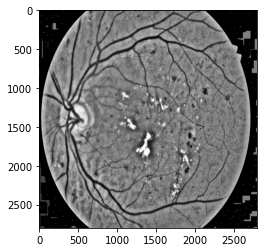

In [ ]:
plt.imshow(Iw,cmap='gray')

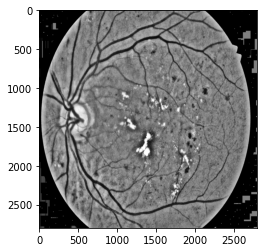

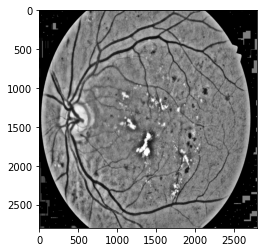

In [ ]:
filterSize=(3,3)
Iw1=cv2.blur(Iw, filterSize)
plt.imshow(Iw1,cmap='gray')
plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                   (3,3)) 
  
# Applying the Top-Hat operation 
tophat_img = cv2.morphologyEx(Iw1,  
                              cv2.MORPH_CLOSE, 
                              kernel)
plt.imshow(tophat_img,cmap='gray')
plt.show()

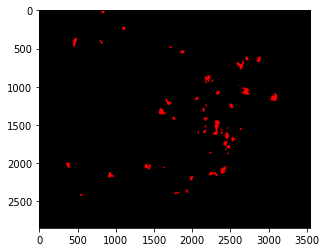

In [ ]:
img_sz = 536
img = imread(train_data_gt[1][20])
img=img[:,250:3800,:]
plt.imshow(img)
plt.show()

In [ ]:
print(np.max(Iw),np.min(Iw))

1.0 0.0


In [ ]:
Iw

array([[0. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       ...,
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5]])

In [ ]:
min_Gr_ch

0.0

In [ ]:
Iw

array([[nan, nan, nan, ..., 0.5, 0.5, 0.5],
       [nan, nan, nan, ..., 0.5, 0.5, 0.5],
       [nan, nan, nan, ..., 0.5, 0.5, 0.5],
       ...,
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0.5, ..., 0.5, 0.5, 0.5]])

In [ ]:
max_Gr_ch

0.8705882352941177

In [ ]:
min_Gr_ch

0.0